In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Criando o conjunto de dados
data = pd.DataFrame({
    'precisão': ['alta', 'média', 'alta', 'média', 'baixa', 'baixa'],
    'velocidade': ['média', 'baixa', 'alta', 'alta', 'baixa', 'média'],
    'taxa_retrabalho': ['baixa', 'alta', 'baixa', 'baixa', 'alta', 'alta'],
    'classif': ['alta_qualidade', 'baixa_qualidade', 'alta_qualidade', 'alta_qualidade', 'baixa_qualidade', 'baixa_qualidade']
})

In [4]:
# Codificando variáveis categóricas
data = pd.get_dummies(data, columns=['precisão', 'velocidade', 'taxa_retrabalho'], drop_first=True)

# Separando as características e a variável alvo
X = data.drop('classif', axis=1)
y = data['classif']

In [5]:
# Dividindo o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Criando e treinando o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [10]:
# Fazendo previsões
y_pred = model.predict(X_teste)

# Avaliando o modelo
accuracy = accuracy_score(y_teste, y_pred)
report = classification_report(y_teste, y_pred)

print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:\n", report)

Acurácia: 0.5
Relatório de Classificação:
                  precision    recall  f1-score   support

 alta_qualidade       0.50      1.00      0.67         1
baixa_qualidade       0.00      0.00      0.00         1

       accuracy                           0.50         2
      macro avg       0.25      0.50      0.33         2
   weighted avg       0.25      0.50      0.33         2



c:\Users\s408397\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\s408397\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\s408397\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

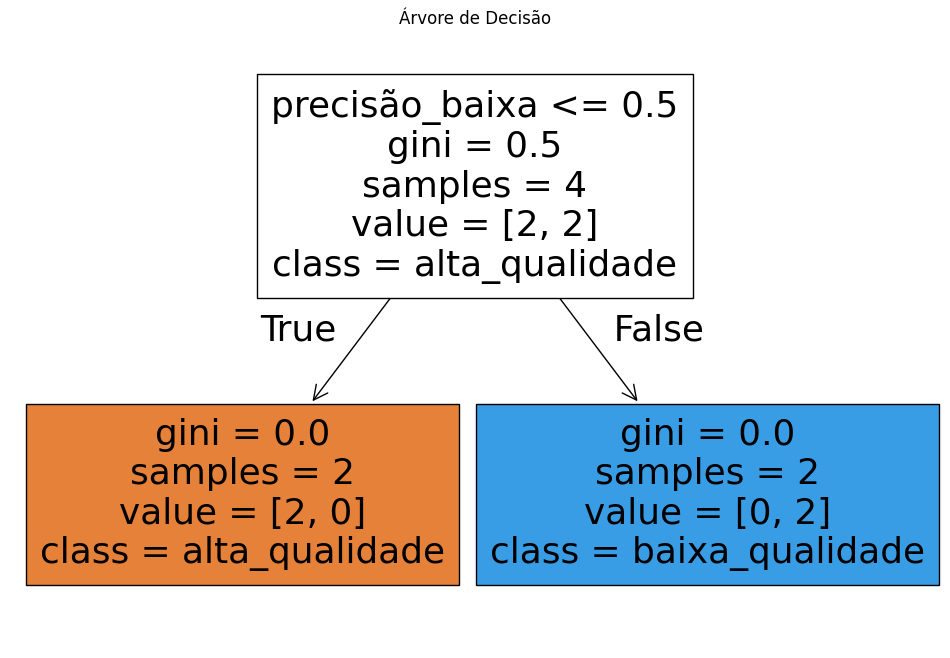

In [11]:
# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title('Árvore de Decisão')
plt.show()